# Exploratory Data Analysis Starter

## Import packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [3]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [4]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [5]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [8]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [9]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [10]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

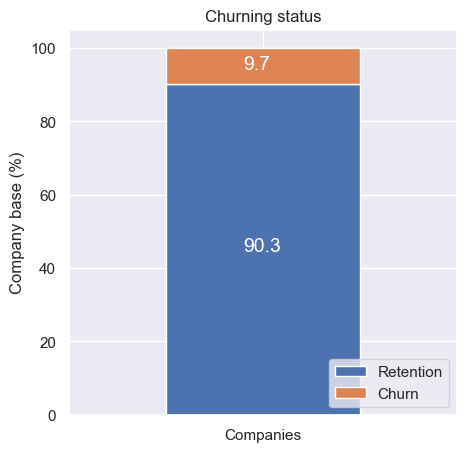

In [11]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

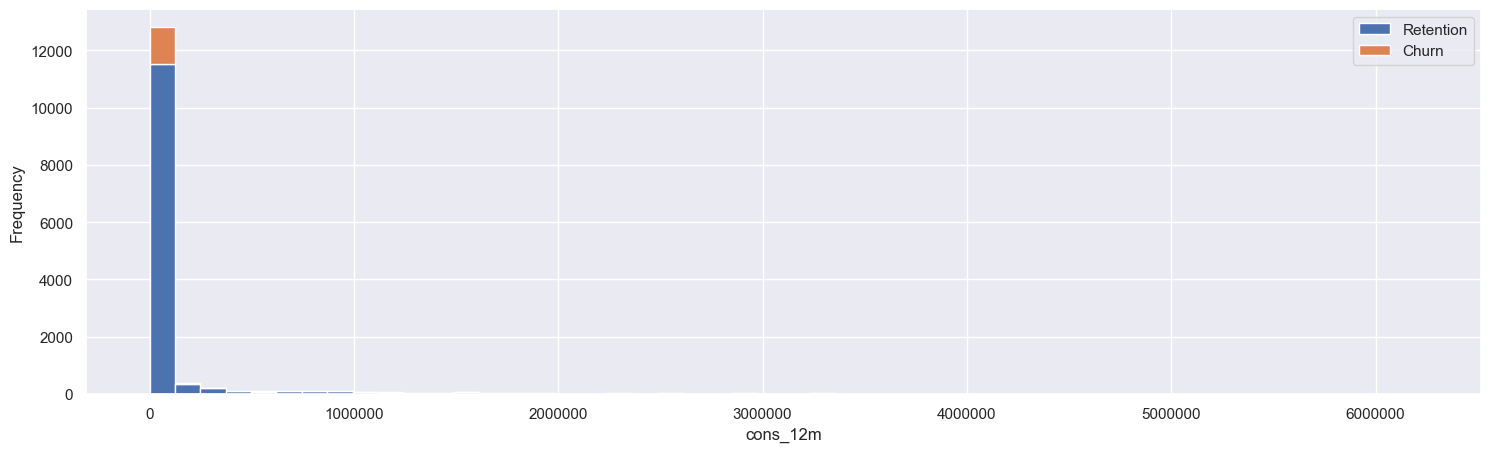

In [12]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

In [13]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [14]:
client_df.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

In [15]:
client_df['churn'].value_counts()

0    13187
1     1419
Name: churn, dtype: int64

In [16]:
client_df['cons_12m'].mean()

159220.2862522251

In [17]:
client_df['cons_12m'].median()

14115.5

In [18]:
client_df['cons_12m'].std()

573465.2641977987

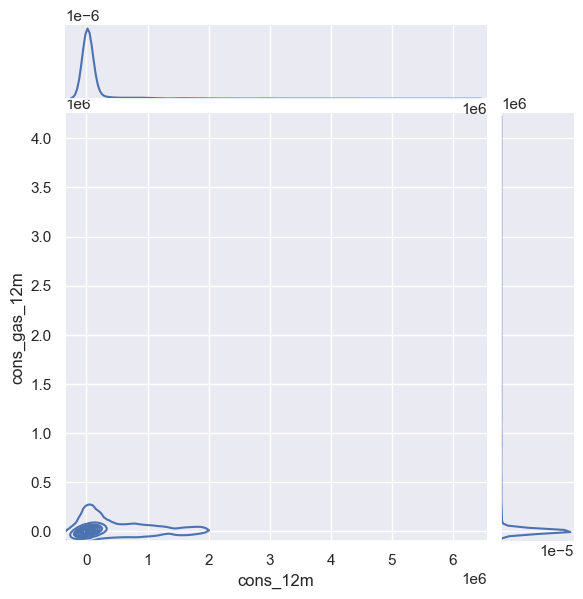

In [19]:
sns.jointplot(x ='cons_12m', y ='cons_gas_12m', data = client_df, kind ='kde')

In [20]:
client_df['has_gas'].value_counts()

f    11955
t     2651
Name: has_gas, dtype: int64

In [21]:
num_clients_both_gas_electricity=client_df['has_gas'].value_counts()[1]


In [22]:
total_number_of_record=len(client_df.index)
percent_people_buys_both=(num_clients_both_gas_electricity / total_number_of_record )*100
print(f"Percentage of customers who bought both gas and electricity : {percent_people_buys_both:.2f} %")

Percentage of customers who bought both gas and electricity : 18.15 %


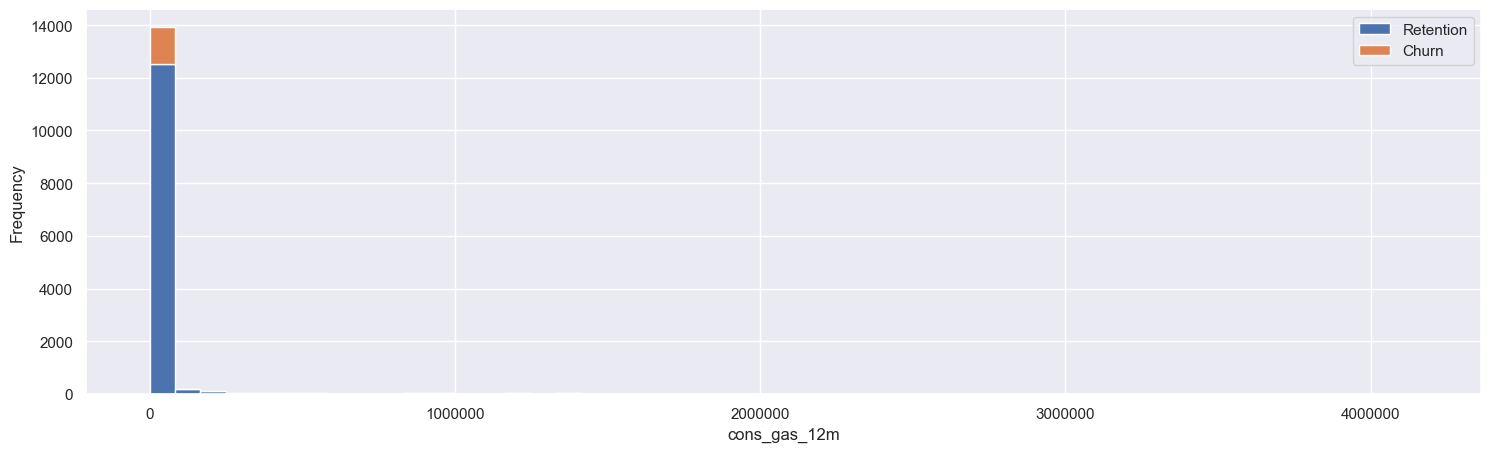

In [23]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_gas_12m', axs)

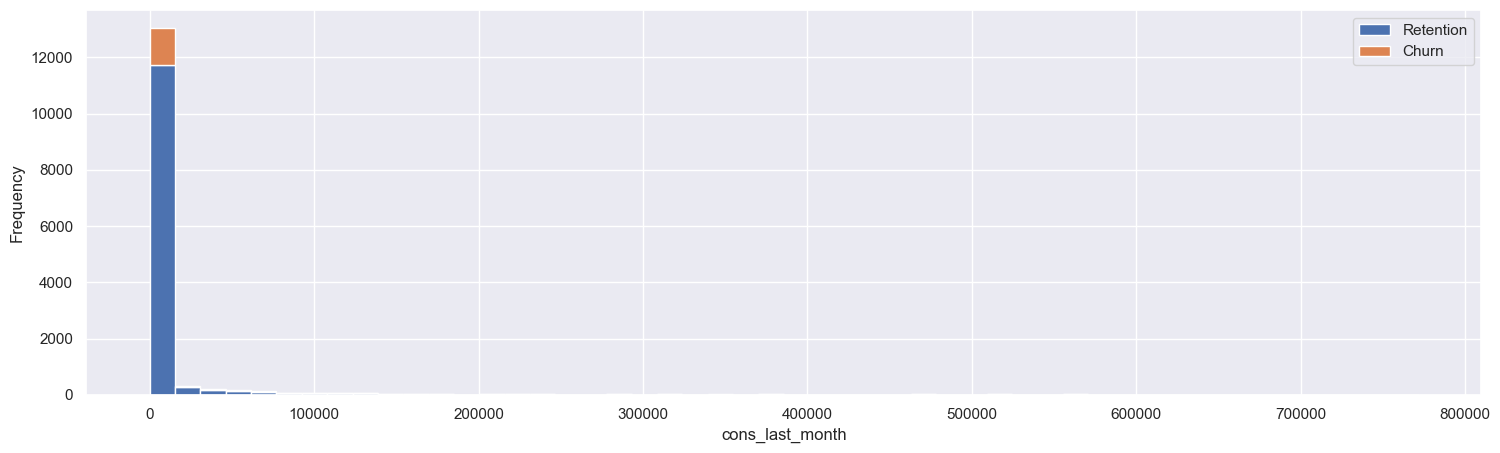

In [24]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_last_month', axs)

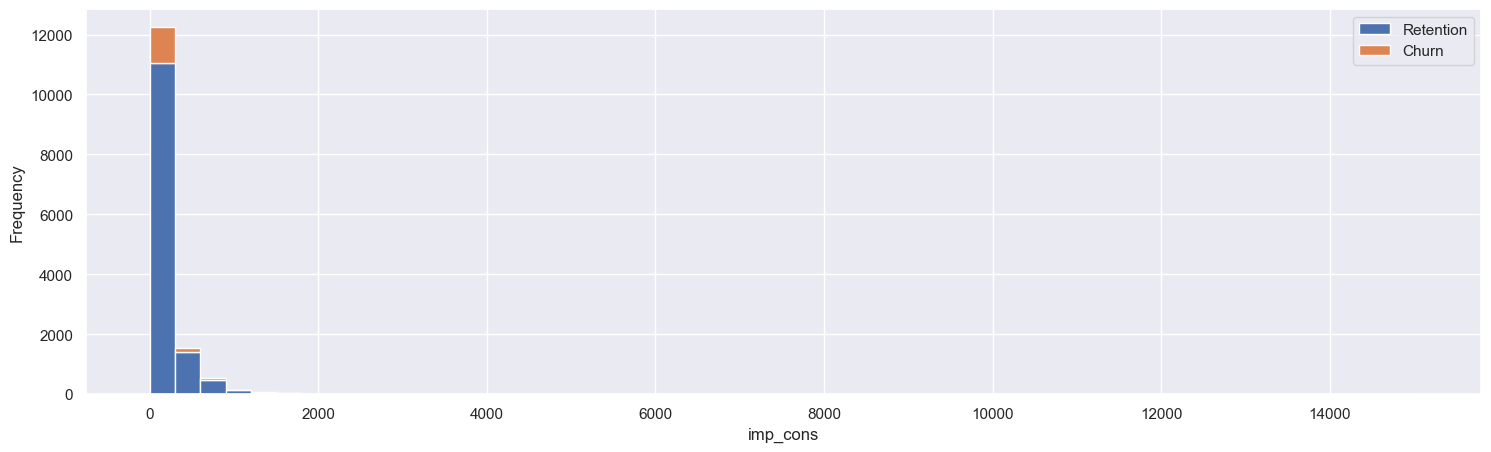

In [25]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'imp_cons', axs)

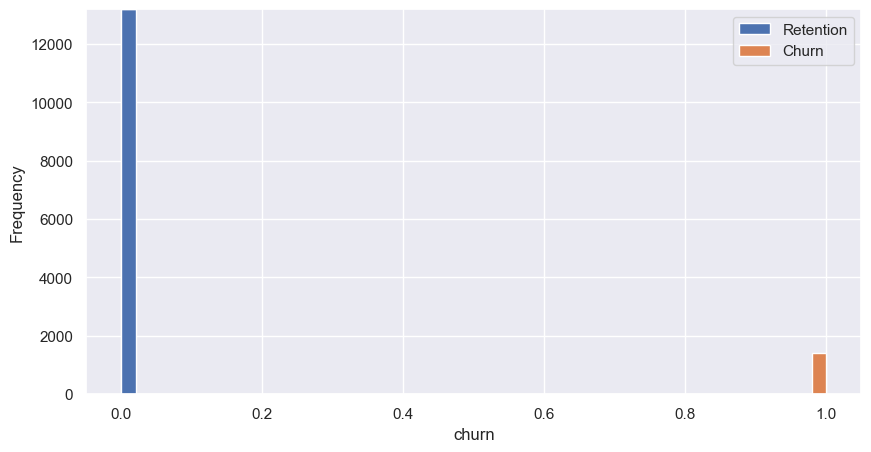

In [26]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(10, 5))

plot_distribution(consumption, 'churn', axs)

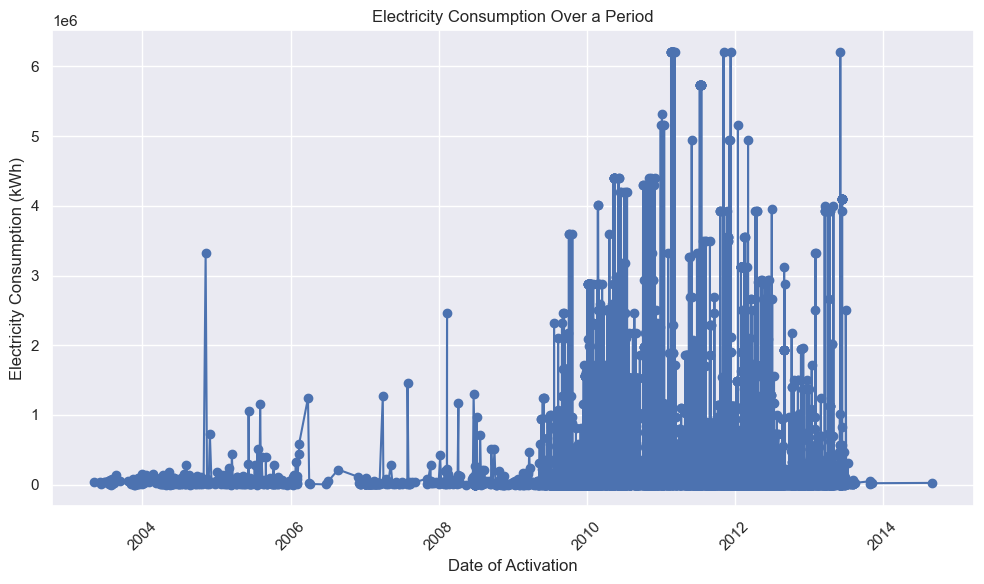

In [27]:
# Convert the 'date_activ' column to a datetime object
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'], format='%Y-%m-%d')

# Sort the DataFrame by the 'date_activ' column
client_df = client_df.sort_values('date_activ')

# Select the columns for plotting
date_activ = client_df['date_activ']
consumption_12m = client_df['cons_12m']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(date_activ, consumption_12m, marker='o', linestyle='-')
plt.title('Electricity Consumption Over a Period')
plt.xlabel('Date of Activation')
plt.ylabel('Electricity Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()

In [28]:
# Convert 'date_activ' and 'date_end' columns to datetime objects
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'], format='%Y-%m-%d')
client_df['date_end'] = pd.to_datetime(client_df['date_end'], format='%Y-%m-%d')

# Calculate the contract period for each client
client_df['contract_period'] = (client_df['date_end'] - client_df['date_activ']).dt.days

# Calculate the average contract period
average_contract_period = client_df['contract_period'].mean()

print(f"Average Contract Period: {average_contract_period:.2f} days")

Average Contract Period: 2007.54 days


In [29]:
maximum_contract_period = client_df['contract_period'].max()
minimum_contract_period = client_df['contract_period'].min()
print(f"Maximum Contract Period: {maximum_contract_period} days")
print(f"Minimum Contract Period: {minimum_contract_period} days")

Maximum Contract Period: 4795 days
Minimum Contract Period: 731 days


In [30]:
client_df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [31]:
client_df['num_years_antig'].value_counts(ascending=True)

1        1
2       11
13      13
10      81
9       92
8      103
12     110
11     185
7      509
5     2317
3     2433
4     3982
6     4769
Name: num_years_antig, dtype: int64

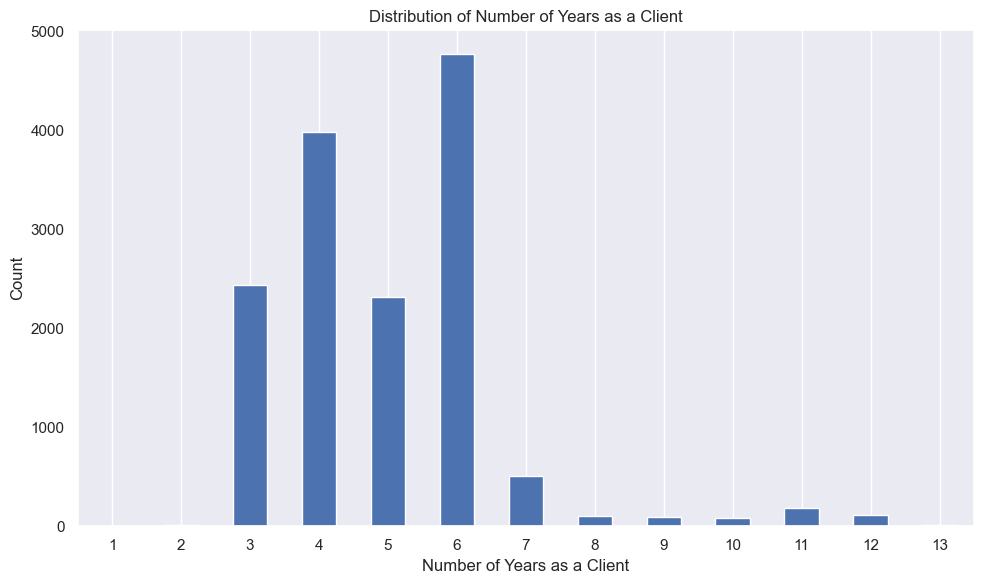

In [32]:
# Create a bar plot for 'num_years_antig'
plt.figure(figsize=(10, 6))
client_df['num_years_antig'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Number of Years as a Client')
plt.xlabel('Number of Years as a Client')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Remove rotation of x-axis labels
plt.grid(axis='y')  # Add grid lines along the y-axis

# Show the plot
plt.tight_layout()
plt.show()

Descriptive Statistics:
Mean Power: 18.14
Median Power: 13.856
Standard Deviation: 13.53
Minimum Power: 3.3
Maximum Power: 320.0




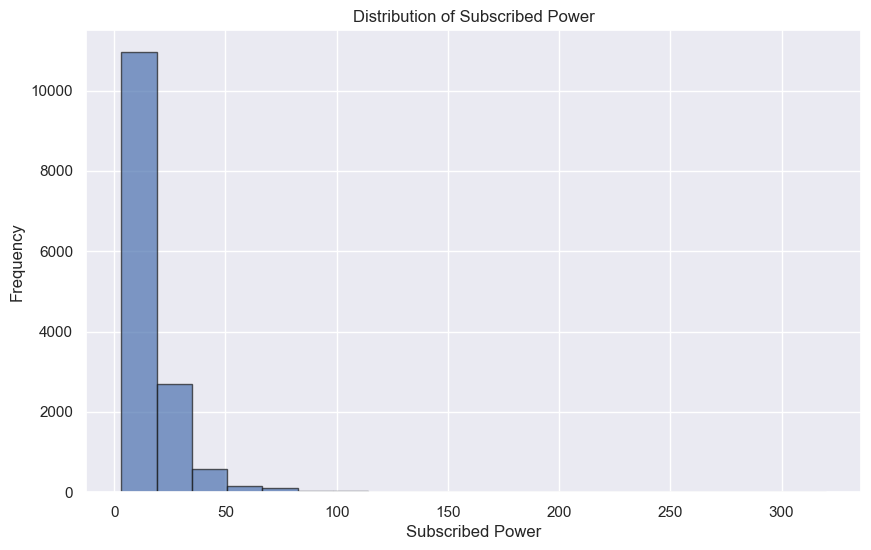

In [33]:


# Descriptive Statistics
mean_power = client_df['pow_max'].mean()
median_power = client_df['pow_max'].median()
std_power = client_df['pow_max'].std()
min_power = client_df['pow_max'].min()
max_power = client_df['pow_max'].max()

print("Descriptive Statistics:")
print(f"Mean Power: {mean_power:.2f}")
print(f"Median Power: {median_power}")
print(f"Standard Deviation: {std_power:.2f}")
print(f"Minimum Power: {min_power}")
print(f"Maximum Power: {max_power}")
print("\n")

# Distribution of Subscribed Power
plt.figure(figsize=(10, 6))
plt.hist(client_df['pow_max'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Subscribed Power')
plt.xlabel('Subscribed Power')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()





In [34]:
# Churn Analysis
mean_power_churned = client_df[client_df['churn'] == 1]['pow_max'].mean()
mean_power_retained = client_df[client_df['churn'] == 0]['pow_max'].mean()

print("Churn Analysis:")
print(f"Mean Subscribed Power for Churned Clients: {mean_power_churned:.2f}")
print(f"Mean Subscribed Power for Retained Clients: {mean_power_retained:.2f}")

Churn Analysis:
Mean Subscribed Power for Churned Clients: 19.39
Mean Subscribed Power for Retained Clients: 18.00


In [35]:
# Correlation Analysis
correlation_power_consumption = client_df['pow_max'].corr(client_df['cons_12m'])
correlation_power_churn = client_df['pow_max'].corr(client_df['churn'])

print("Correlation Analysis:")
print(f"Correlation between Subscribed Power and Electricity Consumption: {correlation_power_consumption:.2f}")
print(f"Correlation between Subscribed Power and Churn: {correlation_power_churn:.2f}")
print("\n")


Correlation Analysis:
Correlation between Subscribed Power and Electricity Consumption: 0.08
Correlation between Subscribed Power and Churn: 0.03




In [36]:
# For off-peak period
client_df['price_sensitivity_off_peak'] = (
    ((client_df['forecast_price_energy_off_peak'] - price_df['price_off_peak_var']) / price_df['price_off_peak_var']) * 100
)

# For peak period
client_df['price_sensitivity_peak'] = (
    ((client_df['forecast_price_energy_peak'] - price_df['price_peak_var']) / price_df['price_peak_var']) * 100
)

# Display the first few rows to check the results
print(client_df[['id', 'price_sensitivity_off_peak', 'price_sensitivity_peak']].head())

                                     id  price_sensitivity_off_peak  \
2015   07abde2ff11ad3fb443963c17b333ef5                  -25.133616   
6135   4e123188a83dd116ce6c3f9f9fb3ae6b                  -24.788256   
4431   60bdfb5dce845441972098b75cb9984f                   -7.818028   
7171   7de6f4ad91b03a376460ff9f3e6500ec                  -31.401173   
13760  87a87579c920ebcbaf4ccdb3f7db62d5                    3.985193   

       price_sensitivity_peak  
2015                      inf  
6135                      inf  
4431                -3.871890  
7171                17.769649  
13760                0.710210  


In [37]:
# Merge the client data with the price data based on the "id" field
merged_data = client_df.merge(price_df, on='id', how='inner')

# Display the first few rows of the merged data to verify the merge
print(merged_data.head())

# Save the merged data to a new CSV file if needed
merged_data.to_csv('merged_data.csv', index=False)

                                 id channel_sales  cons_12m  cons_gas_12m  \
0  07abde2ff11ad3fb443963c17b333ef5       MISSING     44665         42649   
1  07abde2ff11ad3fb443963c17b333ef5       MISSING     44665         42649   
2  07abde2ff11ad3fb443963c17b333ef5       MISSING     44665         42649   
3  07abde2ff11ad3fb443963c17b333ef5       MISSING     44665         42649   
4  07abde2ff11ad3fb443963c17b333ef5       MISSING     44665         42649   

   cons_last_month date_activ   date_end date_modif_prod date_renewal  \
0             3305 2003-05-09 2016-05-09      2003-05-09   2015-05-11   
1             3305 2003-05-09 2016-05-09      2003-05-09   2015-05-11   
2             3305 2003-05-09 2016-05-09      2003-05-09   2015-05-11   
3             3305 2003-05-09 2016-05-09      2003-05-09   2015-05-11   
4             3305 2003-05-09 2016-05-09      2003-05-09   2015-05-11   

   forecast_cons_12m  ...  contract_period  price_sensitivity_off_peak  \
0             4011.0  ..

In [38]:
import statsmodels.api as sm

In [ ]:
merged_data.isnull().sum()

id                                    0
channel_sales                         0
cons_12m                              0
cons_gas_12m                          0
cons_last_month                       0
date_activ                            0
date_end                              0
date_modif_prod                       0
date_renewal                          0
forecast_cons_12m                     0
forecast_cons_year                    0
forecast_discount_energy              0
forecast_meter_rent_12m               0
forecast_price_energy_off_peak        0
forecast_price_energy_peak            0
forecast_price_pow_off_peak           0
has_gas                               0
imp_cons                              0
margin_gross_pow_ele                  0
margin_net_pow_ele                    0
nb_prod_act                           0
net_margin                            0
num_years_antig                       0
origin_up                             0
pow_max                               0


In [44]:
small_threshold = 0.001
merged_data['price_sensitivity_peak'] = ((
    (merged_data['forecast_price_energy_peak'] - price_df['price_peak_var']) /
    (price_df['price_peak_var'].clip(lower=small_threshold))  # Clip to prevent zero or negative values
) * 100)


In [46]:
import numpy as np

In [48]:
merged_data['price_sensitivity_peak'] = ((
    (merged_data['forecast_price_energy_peak'] - price_df['price_peak_var']) /
    price_df['price_peak_var']
) * 100)
# Handle missing data
merged_data['price_sensitivity_peak'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [52]:
merged_data = merged_data[~merged_data['price_sensitivity_peak'].isin([np.inf, -np.inf])]


In [57]:
merged_data.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
contract_period                   0
price_sensitivity_off_peak  

In [56]:
merged_data['price_sensitivity_peak'].fillna(0, inplace=True)


In [61]:
from scipy.stats import pearsonr

In [62]:
# Define the independent variable (price sensitivity) and the dependent variable (churn)
price_sensitivity = merged_data['price_sensitivity_peak']
churn = merged_data['churn']

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(price_sensitivity, churn)

# Determine the significance level (alpha)
alpha = 0.05  # You can adjust this based on your desired significance level

# Print the results
print(f"Pearson Correlation: {correlation:.4f}")
print(f"P-Value: {p_value:.4f}")

# Perform a hypothesis test
if p_value < alpha:
    print("Hypothesis Test: Price Sensitivity is correlated with Churn (reject null hypothesis)")
else:
    print("Hypothesis Test: Price Sensitivity is not correlated with Churn (fail to reject null hypothesis)")

Pearson Correlation: 0.0106
P-Value: 0.0000
Hypothesis Test: Price Sensitivity is correlated with Churn (reject null hypothesis)
